In [1]:
import pandas as pd
from sklearn import tree
from collections import Counter
from sklearn.model_selection import train_test_split,cross_validate,KFold
from sklearn.metrics import precision_score,roc_auc_score,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import io
# from google.colab import files

# uploaded = files.upload()
# #extract the data
# raw_df = pd.read_csv(io.BytesIO(uploaded['Skin_NonSkin.txt']), delimiter='	')




# #extract the data
raw_df = pd.read_csv('~/ML_class_projects/a_1/Skin_NonSkin.txt', delimiter='	')
cleaned_df = raw_df.copy()
print(cleaned_df.head(5))

cleaned_df['class']=np.array([1 if x==1 else 0 for x in cleaned_df['class']])

#summarize data distribution
y=np.array(cleaned_df['class'])
X=np.array(cleaned_df.iloc[:,:-1])
print(Counter(y))







   val1  val2  val3  class
0    74    85   123      1
1    73    84   122      1
2    72    83   121      1
3    70    81   119      1
4    70    81   119      1
Counter({0: 194198, 1: 50859})


NameError: name 'm' is not defined

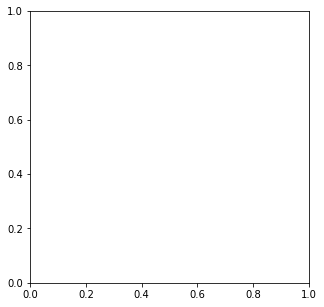

In [2]:
###########Cross-validation to find the best Min_impurity_decrease#################
#test overfitting methods: max_depth,min_samples_split,min_samples_leaf, choose min_impurity_decrease
# Min_impurity_decrease=[0,0.000000002,0.000000005,0.00000001,0.0000001,0.0000002,0.0000004,0.0000006]
# ,0.0000008,0.000001,0.000002,0.000004,0.000006,0.000008,0.00001,0.00005,0.0001]
# ,0.0000008,0.000001]
# ,0.000002,0.000004,0.000006,0.000008,0.00001,0.00005,0.0001]

t=10
cv = KFold(n_splits=t,shuffle=True)


AUC_train_score_list=[]
AUC_test_score_list=[]

Min_impurity_decrease=[0,1e-10,5e-10,8e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-5,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3]
#0.0000000001,0.000000002,0.000000003,0.000000004,0.000000005,0.00000001,0.0000001]
# ,0.0000002,0.0000004,0.0000006]
# ,0.0000004,0.0000006,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01,0.05,0.1]



for min_impurity_decrease in Min_impurity_decrease:
    #define pipline
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    scores =  cross_validate(clf, X, y, scoring=['precision','roc_auc'], cv=cv, n_jobs=-1,return_train_score=True)
    AUC_train_score_list.append(sum(scores['train_roc_auc'])/t)
    AUC_test_score_list.append(sum(scores['test_roc_auc'])/t)
    

#generate AUC tunning graph#####
fig_0, axs = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
axs.plot(Min_impurity_decrease,AUC_train_score_list,"r^",linestyle = "--",label='training data')
axs.plot(Min_impurity_decrease,AUC_test_score_list,"b^",linestyle = "--",label='test data')
axs.set_xlabel("min_impurity_decrease")
axs.set_ylabel("AUC_score")
axs.legend()
fig_0.suptitle("Fig_2.1.0: AUC_score(Decision Tree Tuning)")

fig_0.savefig("Decision_fig_2.0:AUC_score for tunning.png")



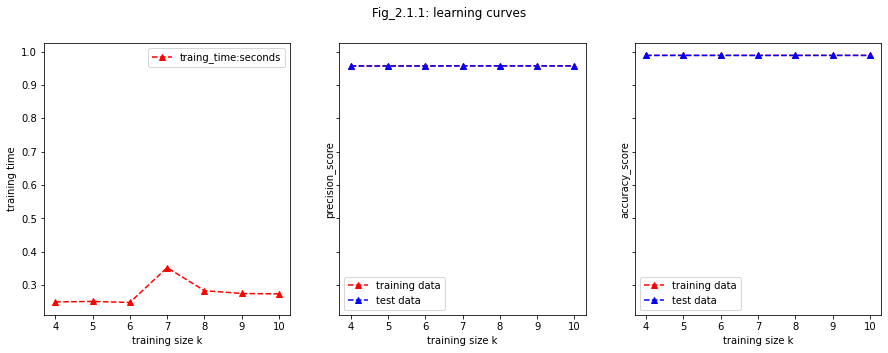

In [7]:
###############Apply the parameter min_impurity_decrease=1e-3 to train the model#############
#######generate learning curves Fig_2.1.1 with increasing training size#######

Accuracy_train_score=[]
Accuracy_test_score=[]
Precision_train_score=[]
Precision_test_score=[]
training_time = []

for k in range(4,11):
    cv = KFold(n_splits=k,shuffle=True)
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=1e-3)
    scores =  cross_validate(clf, X, y, scoring=['accuracy','precision'], cv=cv, n_jobs=-1,return_train_score=True)
    
    training_time.append(sum(scores['fit_time'])/k)
    Accuracy_train_score.append(sum(scores['train_accuracy'])/k)
    Accuracy_test_score.append(sum(scores['test_accuracy'])/k)
    Precision_train_score.append(sum(scores['train_precision'])/k)
    Precision_test_score.append(sum(scores['test_precision'])/k)
    
    
K= range(4,11)
fig_1, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].plot(K,training_time,"r^",linestyle = "--",label="traing_time:seconds")
axs[0].set_xlabel("training size k")
axs[0].set_ylabel("training time")
axs[1].plot(K,Precision_train_score,"r^",linestyle = "--",label='training data')
axs[1].plot(K,Precision_test_score,"b^",linestyle = "--",label='test data')
axs[1].set_xlabel("training size k")
axs[1].set_ylabel("precision_score")
axs[2].plot(K,Accuracy_train_score,"r^",linestyle = "--",label='training data')
axs[2].plot(K,Accuracy_test_score,"b^",linestyle = "--",label='test data')
axs[2].set_xlabel("training size k")
axs[2].set_ylabel("accuracy_score")
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig_1.suptitle("Fig_2.1.1: learning curves")

fig_1.savefig("Decision_fig_2.1:learning curves.png")




In [12]:
##Compare scores and tree_depth without and with prunning, generate data in table_2.1.0###########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)
clf1 = tree.DecisionTreeClassifier()
clf2= tree.DecisionTreeClassifier(min_impurity_decrease=1e-3)
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
print("decision_tree depth without and with prunning is:", clf1.get_depth(),clf2.get_depth())
print("precision_score on training data for decision_tree without and with prunning are:",precision_score(y_train,clf1.predict(X_train)),precision_score(y_train,clf2.predict(X_train)))
print("accuracy_score on training data using decision_tree without and with prunning are:",accuracy_score(y_train,clf1.predict(X_train)),accuracy_score(y_train,clf2.predict(X_train)))
print("precision_score on test data using decision_tree without and with prunning are:",precision_score(y_test,clf1.predict(X_test)),precision_score(y_test,clf2.predict(X_test)))
print("accuracy_score on test data using decision_tree without and with prunning are:",accuracy_score(y_test,clf1.predict(X_test)),accuracy_score(y_test,clf2.predict(X_test)))


decision_tree depth without and with prunning is: 24 6
precision_score on training data for decision_tree without and with prunning are: 0.9999474251465524 0.9579521418924084
accuracy_score on training data using decision_tree without and with prunning are: 0.9999673544006268 0.9885631583529207
precision_score on test data using decision_tree without and with prunning are: 0.998439328911432 0.9581187518933656
accuracy_score on test data using decision_tree without and with prunning are: 0.9993307761364564 0.988280421121358
